In [1]:
from pycocotools.coco import COCO
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
# !git clone https://github.com/Taeyoung96/Yolo-to-COCO-format-converter.git

In [2]:
!mkdir yolo_set
!rm -rf yolo_set/*

mkdir: cannot create directory ‘yolo_set’: File exists


In [3]:
yolo_dir = "../yolov5/runs/val/exp24/labels"
image_dir = "../yolov5/open-pit-rock-chunks-test-3/valid/images"
target_labels_dir = "../yolov5/open-pit-rock-chunks-test-3/valid/labels"

# image_dir = "../yolor/open_pit_train-2/valid/images/"
# target_labels_dir = "../yolor/open_pit_train-2/valid/labels/"
print(len(os.listdir(target_labels_dir)))

29


In [4]:
!cp {image_dir}* {'yolo_set/prediction/'} -a
!cp {yolo_dir}* {'yolo_set/prediction/'} -a
#Скопировать целевые изображения и метки
!cp {image_dir}* {'yolo_set/target/'} -a
!cp {target_labels_dir}* {'yolo_set/target/'} -a|

/bin/bash: -c: line 1: syntax error: unexpected end of file


In [5]:
!python ./Yolo-to-COCO-format-converter/main.py -p "./yolo_set/prediction/" --output "pred.json"
!python ./Yolo-to-COCO-format-converter/main.py -p "./yolo_set/target/" --output "target.json"

Start!
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Finished!
Start!
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Processing 0 ...
Process

In [6]:
def read_coco_datasets(list_images, list_anno, class_id=[0], verbose = True):
    json_dicts = dict()
    for i in range(len(list_anno)):
        if os.path.exists(list_anno[i]) and os.path.exists(list_images[i]): 

            dict_json =\
                  load_coco_json(json_file = list_anno[i], 
                                image_root = list_images[i], 
                                dataset_name = 'None',
                                extra_annotation_keys = None)
            if len(dict_json)>0:
                dict_json = corret_coco_json_path(dict_json, list_images[i])

                dict_json = check_class(dict_json,class_id)

                name_dataset = os.path.split(os.path.split(os.path.split(list_anno[i])[0])[0])[1]

                json_dicts[name_dataset]=dict_json

                if verbose:
                    print(i, len(dict_json))    
    return json_dicts

In [7]:
!pwd

/home/office/kirilman/Projects/asbestos/src/notebooks/visualize_coco


In [8]:
dataset = {}
dataset['target'] = COCO('./output/target.json')
dataset['pred'] = COCO('./output/pred.json')
dataset['target']

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [9]:
def get_image_bbox_annotation(coco_obj, image_id, image_dir, image = None, color = (0,255,0)):
    ann_ids = coco_obj.getAnnIds(iscrowd=False,imgIds = image_id)
    anns = coco_obj.loadAnns(ann_ids)
    anns = [ann for ann in anns if len(ann['bbox']) > 1]
    if len(anns) == 0:
        print('Have not bboxs')
    for i, ann in enumerate(anns):
        image_id = ann["image_id"]
        segs = ann["segmentation"]
        bbox = np.array(ann["bbox"])
        bbox[2:4] = bbox[0:2] + bbox[2:4]
        image_info = coco_obj.loadImgs(image_id)
        image_path = image_info[0]["file_name"]
        if i == 0:
            if image is None:
                image_path = os.path.join(image_dir, image_path)
                image = cv2.imread(image_path)
        segs = [np.array(seg, np.int32).reshape((1, -1, 2))
            for seg in segs]
        for seg in segs: cv2.drawContours(image, seg, -1, (0,255,0), 2)
        cv2.rectangle(image, (int(bbox[0]), int(bbox[1])), 
                  (int(bbox[2]), int(bbox[3])), color, 2, lineType = 1)
    return image

Have not bboxs
Have not bboxs


TypeError: Image data of dtype object cannot be converted to float

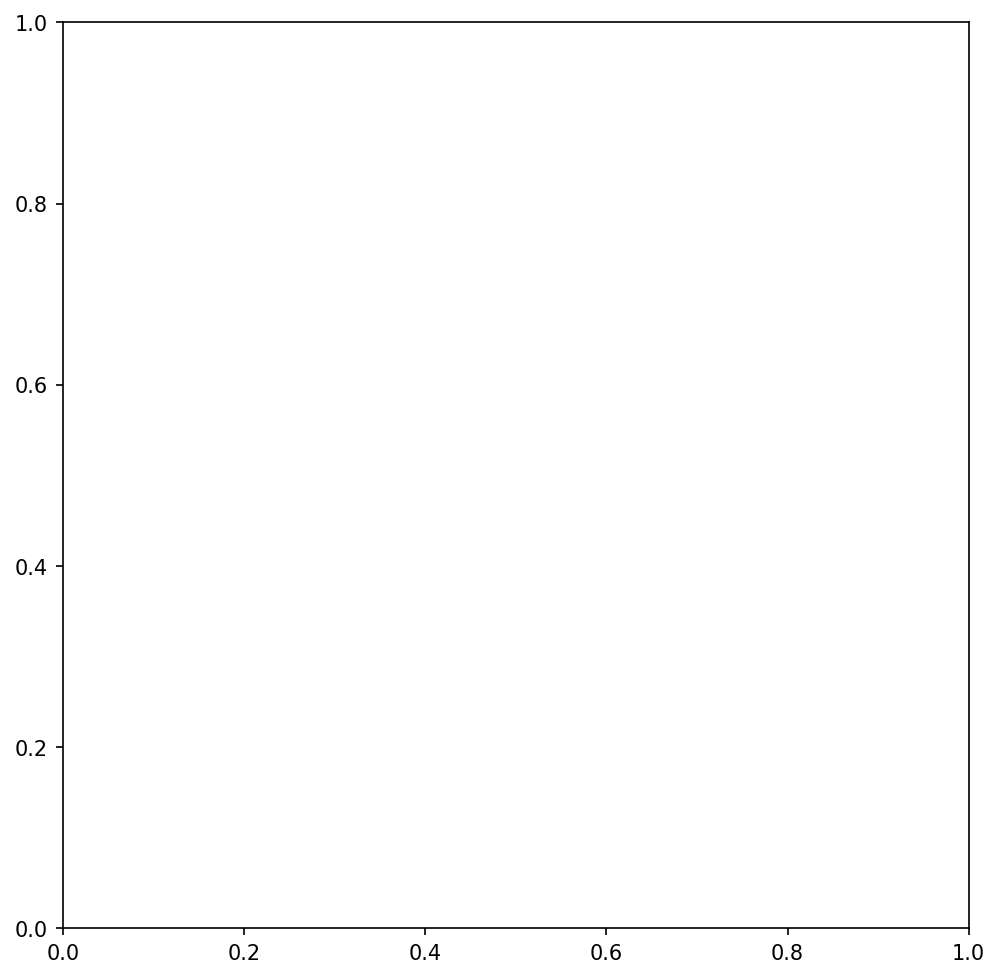

In [10]:
for i,e in enumerate(dataset['target'].dataset['images']):
    image = get_image_bbox_annotation(dataset['target'], i, 'yolo_set/target/',  color = (0,128,0))
    image = get_image_bbox_annotation(dataset['pred'], i,  'yolo_set/prediction/', image, color = (255,0,0))
    fig = plt.figure(dpi = 150, figsize = (8,8))
    plt.imshow(image)
    plt.savefig("mask/{}".format(e['file_name']),)
    if i%5==0:
        print(i)
    plt.close()

In [29]:
!rm mask/*

In [30]:
im = get_image_bbox_annotation(dataset['target'],11,'yolo_set/target/')
im

Have not bboxs


In [35]:
ann_ids = dataset['target'].getAnnIds(iscrowd=False,imgIds = 1)
anns = dataset['target'].loadAnns(ann_ids)
anns

[]